In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import tkinter as tk
from tkinter import filedialog
%matplotlib inline

In [2]:
def findFile(request):  #Ask for File
    print('Please select the ' + request + ' file: ')
    root = tk.Tk()
    root.withdraw()
    root.attributes('-topmost', True)
    filepath = filedialog.askopenfilename()
    root.destroy()
    return filepath

In [3]:
irisDf = pd.read_excel(findFile('Proj1DataSet.xlsx'))

Please select the Proj1DataSet.xlsx file: 


In [34]:
labels = irisDf['species'].unique()
features = list(irisDf.columns.values)

#Assign class labels
irisDf.loc[irisDf['species'] == 'setosa', 'class'] = 1
irisDf.loc[irisDf['species'] == 'virginica', 'class'] = 2
irisDf.loc[irisDf['species'] == 'versicolor', 'class'] = 3

newColumns = ['sepL', 'sepW', 'petL', 'petW', 'class', 'species']
irisDf=irisDf.reindex(columns=newColumns)

markers = [] 
colors = []

# Mark by colors
for index, row in irisDf.iterrows():
    if row['species'] == 'setosa':
        colors.append('crimson')
    elif row['species'] == 'versicolor':
        colors.append('royalblue')
    else:
        colors.append('darkorange')
irisDf.head()

,sepL,sepW,petL,petW,class,species
0,5.1,3.5,1.4,0.2,1.0,setosa
1,4.9,3.0,1.4,0.2,1.0,setosa
2,4.7,3.2,1.3,0.2,1.0,setosa
3,4.6,3.1,1.5,0.2,1.0,setosa
4,5.0,3.6,1.4,0.2,1.0,setosa


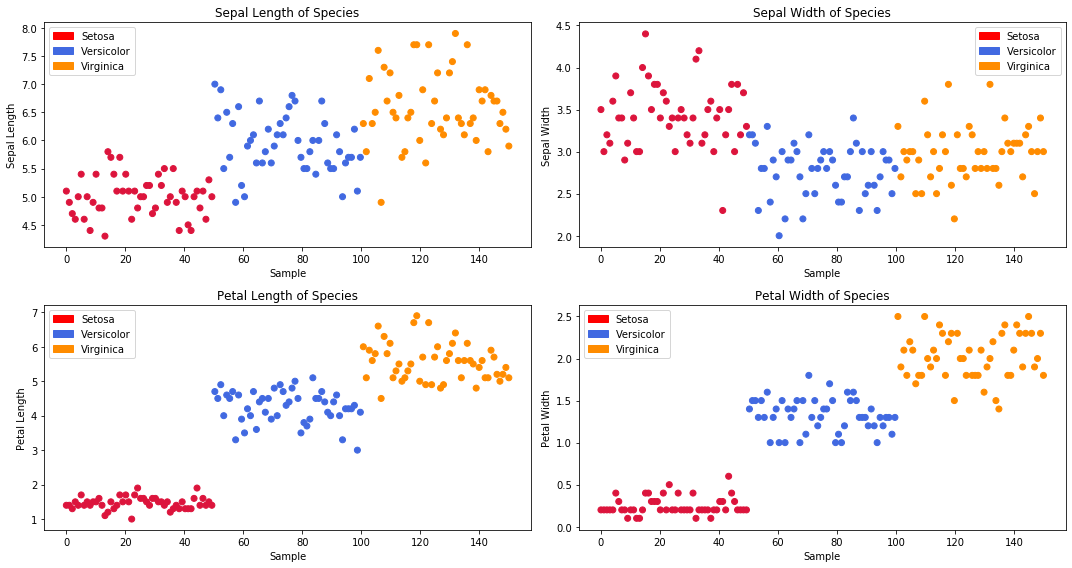

In [35]:
plt.subplots(2,2,figsize=(15,8))
red = mpatches.Patch(color='red', label='Setosa')
blue = mpatches.Patch(color='royalblue', label='Versicolor')
orange = mpatches.Patch(color='darkorange', label='Virginica')

plt.subplot(2,2,1)
plt.scatter(np.linspace(0,len(irisDf['sepL'].values),len(irisDf['sepL'].values)), \
            irisDf['sepL'].values,marker='o',c=colors)
plt.title('Sepal Length of Species')
plt.xlabel('Sample')
plt.ylabel('Sepal Length')
plt.legend(handles=[red,blue,orange])

plt.subplot(2,2,2)
plt.scatter(np.linspace(0,len(irisDf['sepL'].values),len(irisDf['sepW'].values)), \
            irisDf['sepW'].values,marker='o',c=colors)
plt.title('Sepal Width of Species')
plt.xlabel('Sample')
plt.ylabel('Sepal Width')
plt.legend(handles=[red,blue,orange])

plt.subplot(2,2,3)
plt.scatter(np.linspace(0,len(irisDf['sepL'].values),len(irisDf['petL'].values)), \
            irisDf['petL'].values,marker='o',c=colors)
plt.title('Petal Length of Species')
plt.xlabel('Sample')
plt.ylabel('Petal Length')
plt.legend(handles=[red,blue,orange])

plt.subplot(2,2,4)
plt.scatter(np.linspace(0,len(irisDf['sepL'].values),len(irisDf['petW'].values)), \
            irisDf['petW'].values,marker='o',c=colors)
plt.title('Petal Width of Species')
plt.xlabel('Sample')
plt.ylabel('Petal Width')
plt.legend(handles=[red,blue,orange])


plt.tight_layout()
plt.show()

In [6]:
#1. The features in this dataset are distinct enough to solve the problem, 
#   I expect the petal length and width features to be the better features 
#   for classifying the three flower species.

In [7]:
#Compute stats of features

mins = []
maxs = []
means = []
var = []
intraVar = []
interVar = []

setosa = irisDf.loc[irisDf['species'] == 'setosa']
versicolor = irisDf.loc[irisDf['species'] == 'versicolor']
virginica = irisDf.loc[irisDf['species'] == 'virginica']

priorSetosa = len(setosa)/len(irisDf)
priorVersicolor = len(versicolor)/len(irisDf)
priorVirginica = len(virginica)/len(irisDf)


for i in range(0,len(features) - 1):
    
    mins.append(np.min(irisDf[features[i]]))
    maxs.append(np.max(irisDf[features[i]]))
    means.append(np.mean(irisDf[features[i]]))
    var.append(np.var(irisDf[features[i]]))
    
    intraVar.append( (priorSetosa*(np.var(setosa[features[i]]))) \
                    + (priorVersicolor*(np.var(versicolor[features[i]]))) \
                    + (priorVirginica*(np.var(virginica[features[i]]))) )
    
    interVar.append( (priorSetosa*(np.mean(setosa[features[i]]) - means[i])**2) \
                   + (priorVersicolor*(np.mean(versicolor[features[i]]) - means[i])**2) \
                   + (priorVirginica*(np.mean(virginica[features[i]]) - means[i])**2))

In [8]:
statDf = pd.DataFrame([mins,maxs,means,var,intraVar,interVar], \
                      columns = ['sepL', 'sepW', 'petL', 'petW'], \
                      index=['Min', 'Max', 'Mean' , 'Var' , 'IntraClassVar' , 'InterClassVar'])

In [30]:
statDf

,sepL,sepW,petL,petW
Min,4.300000,2.000000,1.000000,0.100000
Max,7.900000,4.400000,6.900000,2.500000
Mean,5.843333,3.057333,3.758000,1.199333
Var,0.681122,0.188713,3.095503,0.577133
IntraClassVar,0.259708,0.113080,0.181484,0.041044
InterClassVar,0.421414,0.075633,2.914019,0.536089


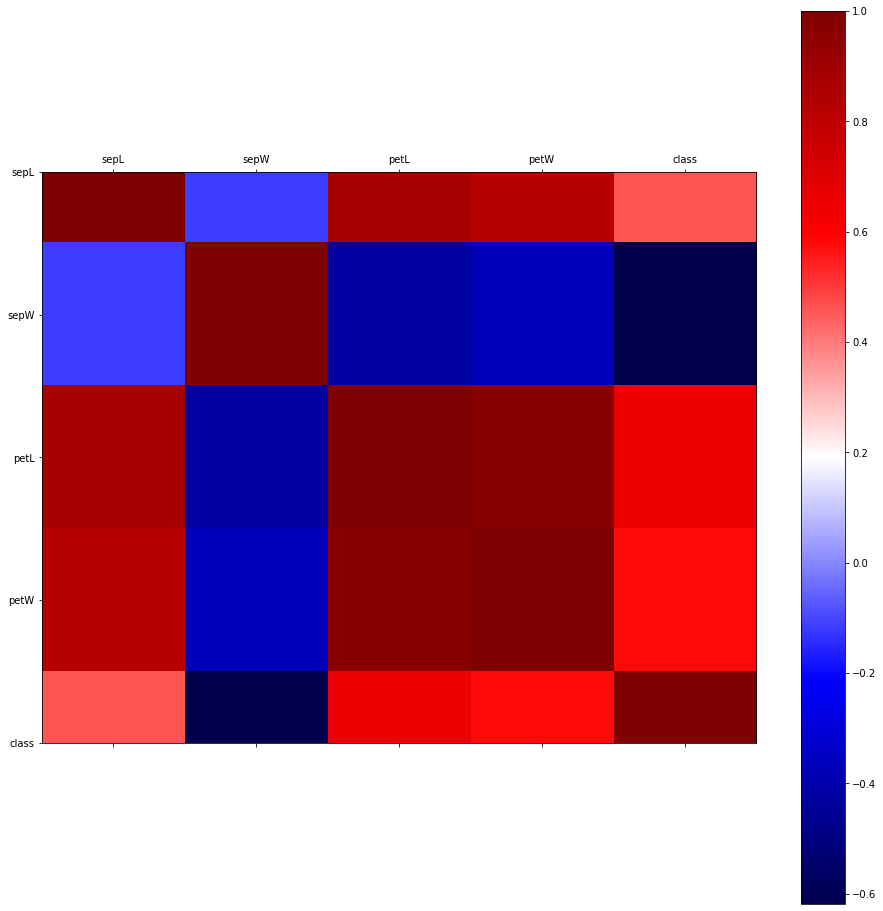

In [18]:
## Correlation Coefficients
plt.matshow(irisDf[:-1].corr(),cmap='seismic')
plt.xticks(range(len(irisDf.columns)-1), irisDf.columns[:-1])
plt.yticks(range(len(irisDf.columns)-1), irisDf.columns[:-1])
plt.colorbar()
plt.rcParams["figure.figsize"] = [50,50]

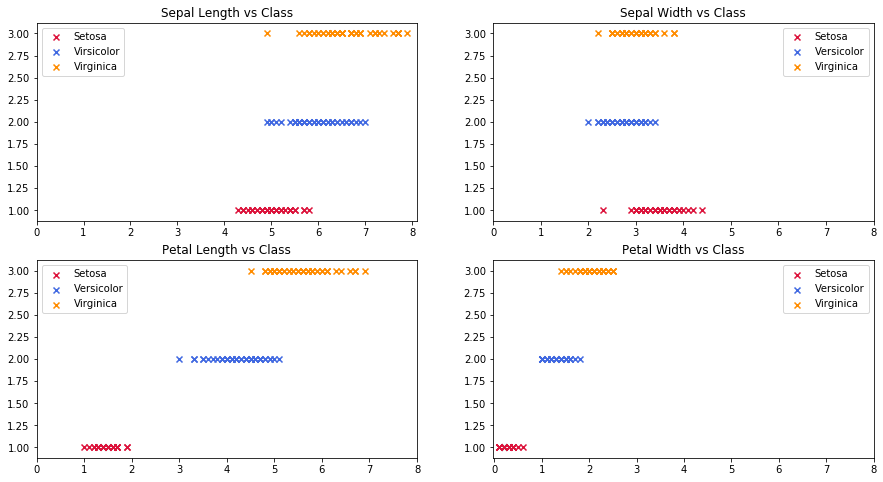

In [43]:
# Features vs Class Labels
plt.subplots(2,2,figsize=(15,8))


plt.subplot(2,2,1)
plt.scatter(setosa['sepL'], np.ones([len(setosa),1]), marker='x', c='crimson')
plt.scatter(versicolor['sepL'], 2*np.ones([len(setosa),1]), marker='x', c='royalblue')
plt.scatter(virginica['sepL'], 3*np.ones([len(setosa),1]), marker='x', c='darkorange')
plt.xticks(np.arange(0,9,1))
plt.title('Sepal Length vs Class')
plt.legend(['Setosa','Virsicolor','Virginica'])

plt.subplot(2,2,2)
plt.scatter(setosa['sepW'], np.ones([len(setosa),1]), marker='x', c='crimson')
plt.scatter(versicolor['sepW'], 2*np.ones([len(setosa),1]), marker='x', c='royalblue')
plt.scatter(virginica['sepW'], 3*np.ones([len(setosa),1]), marker='x', c='darkorange')
plt.xticks(np.arange(0,9,1))
plt.title('Sepal Width vs Class')
plt.legend(['Setosa','Versicolor','Virginica'])

plt.subplot(2,2,3)
plt.scatter(setosa['petL'], np.ones([len(setosa),1]), marker='x', c='crimson')
plt.scatter(versicolor['petL'], 2*np.ones([len(setosa),1]), marker='x', c='royalblue')
plt.scatter(virginica['petL'], 3*np.ones([len(setosa),1]), marker='x', c='darkorange')
plt.xticks(np.arange(0,9,1))
plt.title('Petal Length vs Class')
plt.legend(['Setosa','Versicolor','Virginica'])

plt.subplot(2,2,4)
plt.scatter(setosa['petW'], np.ones([len(setosa),1]), marker='x', c='crimson')
plt.scatter(versicolor['petW'], 2*np.ones([len(setosa),1]), marker='x', c='royalblue')
plt.scatter(virginica['petW'], 3*np.ones([len(setosa),1]), marker='x', c='darkorange')
plt.xticks(np.arange(0,9,1))
plt.title('Petal Width vs Class')
plt.legend(['Setosa','Versicolor','Virginica'])